# Author : Sachin S. Singh
## Task 6 : Prediction using Decision Tree Algorithm
## GRIP @ The Sparks Foundation

Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it
graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.
&nbsp;


## Libraries  : Scikit Learn, Numpy Array, Seaborn, Pandas, Matplotlib, Pydot

In [32]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image


## Step 1 - Loading the Dataset

In [33]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

## Step 2 - Exploratory Data Analysis

In [34]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.sample(5)


,Petal length,Petal Width,Sepal Length,Sepal Width,Species
141,6.9,3.1,5.1,2.3,virginica
128,6.4,2.8,5.6,2.1,virginica
87,6.3,2.3,4.4,1.3,versicolor
57,4.9,2.4,3.3,1.0,versicolor
147,6.5,3.0,5.2,2.0,virginica


In [35]:
data.shape

(150, 5)

In [36]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 3 - Data Visualization comparing various features

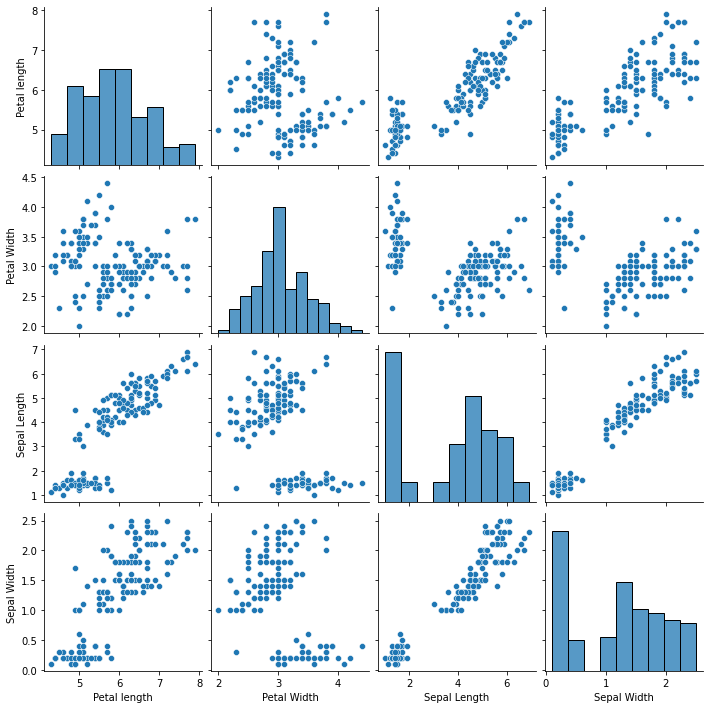

In [37]:
# Input data Visualization
sns.pairplot(data)

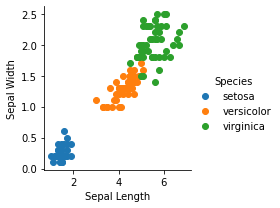

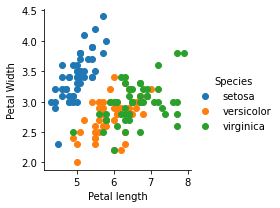

In [38]:
 # Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()


## Step 4 - Decision Tree Model Training

In [39]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)


Training Complete.


## Step 5 - Comparing the actual and predicted flower classification

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df.sample(5)

,Actual,Predicted
0,0,0
1,1,1
27,0,0
17,1,1
10,1,1


## Step 6 - Visualizing the Trained Model

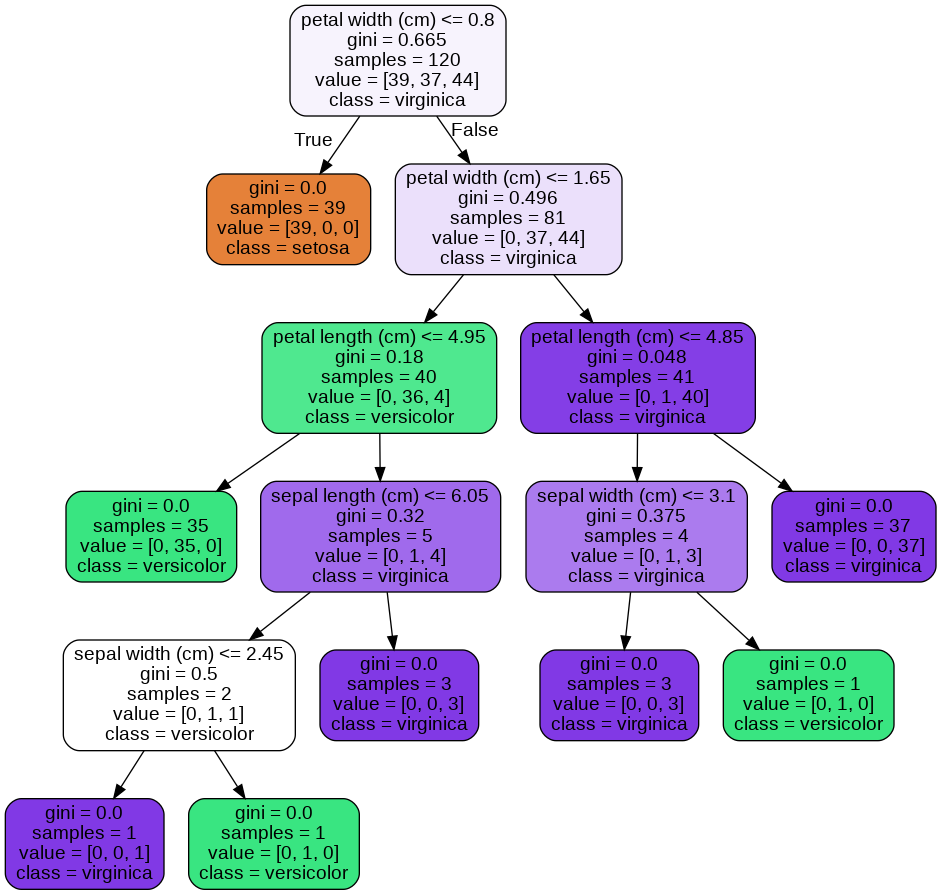

In [41]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png') 

## Step 7 - Predicting the class output for some random values of petal and sepal length and width

In [42]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.2cm and 3.7cm and sepal length and width are 0.5cm and 1.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.2, 3.7, 0.3, 1.2]]))
print()
print("Our model predicts the class as 1, that is, versicolor.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.2cm and 3.7cm and sepal length and width are 0.5cm and 1.2cm. 

Output =  [1]

Our model predicts the class as 1, that is, versicolor.


## Step 8 - Calculating the Model accuracy

In [43]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


The accuracy of this model is 0.966 or 96.6% since I have taken all the 4 features of the iris dataset for creating the decision tree model.

## Conclusion
### I was  able to successfully carry-out prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.
# Thank You